In [1]:
import aiomoex
import aiohttp
import pandas as pd
import asyncio
import numpy as np

from IPython.display import display
from finance.moex import indices


In [2]:
async def get_all_engines_and_markets():
    async with aiohttp.ClientSession() as session:
        # Получить все engines (движки)
        engines = await aiomoex.get_reference(session, 'engines')
        df_engines = pd.DataFrame(engines)
        
        # Получить все markets (рынки)
        markets = await aiomoex.get_reference(session, 'markets')
        df_markets = pd.DataFrame(markets)
        
        # Получить все boards (режимы торгов)
        boards = await aiomoex.get_reference(session, 'boards')
        df_boards = pd.DataFrame(boards)
        
        # Дополнительно: другие доступные справочники
        boardgroups = await aiomoex.get_reference(session, 'boardgroups')
        df_boardgroups = pd.DataFrame(boardgroups)
        
        return {
            'engines': df_engines,
            'markets': df_markets,
            'boards': df_boards,
            'boardgroups': df_boardgroups
        }

mebb = await get_all_engines_and_markets()

engines = mebb["engines"]
markets = mebb["markets"]
boards = mebb["boards"]
boardgroups = mebb["boardgroups"]

for key, df in mebb.items():
    print()
    print(f"=== {key.upper()} ({len(df)}) ===")
    if len(df) > 20:
        display(df.head(2))
    else:
        display(df)


=== ENGINES (11) ===


,id,name,title
0,1,stock,Фондовый рынок и рынок депозитов
1,2,state,Рынок ГЦБ (размещение)
2,3,currency,Валютный рынок
3,4,futures,Срочный рынок
4,5,commodity,Товарный рынок
5,6,interventions,Товарные интервенции
6,7,offboard,ОТС-система
7,9,agro,Агро
8,1012,otc,ОТС с ЦК
9,1282,quotes,Квоты



=== MARKETS (48) ===


,id,trade_engine_id,trade_engine_name,trade_engine_title,market_name,market_title,market_id,marketplace,is_otc,has_history_files,has_history_trades_files,has_trades,has_history,has_candles,has_orderbook,has_tradingsession,has_extra_yields,has_delay
0,1328,1326,money,Денежный рынок,repo,РЕПО ФК,1328,MONEY,0,0,0,0,0,0,0,0,0,0
1,1327,1326,money,Денежный рынок,deposit,Депозиты ФК,1327,MONEY,0,0,0,0,0,0,0,0,0,0



=== BOARDS (410) ===


,id,board_group_id,engine_id,market_id,boardid,board_title,is_traded,has_candles,is_primary
0,177,57,1,1,TQIF,Т+: Паи - безадрес.,1,1,1
1,178,57,1,1,TQTF,Т+: ETF - безадрес.,1,1,1



=== BOARDGROUPS (277) ===


,id,trade_engine_id,trade_engine_name,trade_engine_title,market_id,market_name,name,title,is_default,board_group_id,is_traded,is_order_driven,category
0,9,1,stock,Фондовый рынок и рынок депозитов,5,index,stock_index,Индексы,1,9,1,NaN,main
1,104,1,stock,Фондовый рынок и рынок депозитов,5,index,stock_index_inav,INAV,0,104,1,NaN,main


In [3]:
stocks = engines[engines["name"] == "stock"].iloc[0]
stock_markets = markets[markets["trade_engine_id"] == stocks["id"]]

shares = stock_markets[stock_markets["market_name"] == "shares"].iloc[0]
assert len(stock_markets[stock_markets["market_name"] == "shares"]) == 1
bonds = stock_markets[stock_markets["market_name"] == "bonds"].iloc[0]
assert len(stock_markets[stock_markets["market_name"] == "bonds"]) == 1

In [4]:
idx_df = indices.get_df()
display(idx_df)

,index,desc,group
0,IMOEX,Индекс МосБиржи (рубли),broad_market
1,IMOEX10,Индекс МосБиржи 10,broad_market
2,RTSI,RTS Index (доллары США),broad_market
3,IMOEX2,Индекс МосБиржи 2 (расширенный рынок),broad_market
4,MOEXOG,Нефть и газ,sectoral
5,MOEXFN,Финансовый сектор,sectoral
6,MOEXCN,Потребительский сектор,sectoral
7,MOEXMM,Металлы и добыча,sectoral
8,MOEXCH,Химия и нефтехимия,sectoral
9,MOEXTN,Телекоммуникации,sectoral


In [5]:
gas = idx_df[idx_df["desc"].str.lower().str.contains("нефть и газ")].iloc[0]
display(gas)

index         MOEXOG
desc     Нефть и газ
group       sectoral
Name: 4, dtype: object

In [6]:
async def get_index_tickers(index, engine="stock"):
    async with aiohttp.ClientSession() as session:
        url = "https://iss.moex.com" f"/iss/statistics/engines/{engine}/markets/index/analytics/{index}/tickers.json"
        iss = aiomoex.ISSClient(session, url)
        tickers = await iss.get()
    return pd.DataFrame(tickers["tickers"])
gas_tickers = await get_index_tickers(gas["index"])

In [7]:
print(f"=== TICKERS IN GAS ({len(gas_tickers)}) ===")
display(gas_tickers.head())

=== TICKERS IN GAS (23) ===


,ticker,from,till,tradingsession
0,BANE,2011-12-16,2017-03-16,3
1,BANEP,2012-09-18,2025-10-20,3
2,GAZP,2006-01-24,2025-10-20,3
3,JNOSP,2014-12-16,2015-06-15,3
4,KRKNP,2016-12-16,2017-12-21,3


In [8]:
async def get_index_history(sequrity, market) -> pd.DataFrame:
    async with aiohttp.ClientSession() as session:
        hist = await aiomoex.get_market_history(session, sequrity, market)
    hist = pd.DataFrame(hist)
    hist["TRADEDATE"] = pd.to_datetime(hist["TRADEDATE"])
    return hist

gazp_hist = await get_index_history("GAZP", 'stock')

In [9]:
display(gazp_hist.head())

,BOARDID,TRADEDATE,CLOSE,VOLUME,VALUE
0,EQNE,2006-01-23,218.89,5120765,1.130995e+09
1,EQNE,2006-01-24,224.00,8983192,1.991942e+09
2,EQNE,2006-01-25,228.38,15480374,3.534137e+09
3,EQNE,2006-01-26,224.47,7588759,1.721376e+09
4,EQNE,2006-01-27,228.75,12729718,2.901323e+09


In [10]:
gazp_hist.dtypes

BOARDID              object
TRADEDATE    datetime64[ns]
CLOSE               float64
VOLUME                int64
VALUE               float64
dtype: object

In [11]:
print(len(pd.unique(gazp_hist["TRADEDATE"])))
print(len(gazp_hist))
print(gazp_hist["BOARDID"].unique())
for b in gazp_hist["BOARDID"].unique():
    elts = gazp_hist[gazp_hist["BOARDID"] == b]
    desc = boards[boards["boardid"] == b]["board_title"]
    print(f"{b} ({len(elts)}) - {desc}")

4966
11415
['EQNE' 'EQCC' 'SMAL' 'EQDP' 'TQNE' 'TQBS' 'TQBR' 'SPEQ']
EQNE (1901) - 28    Основной режим: Акции и паи внесписочные - без...
Name: board_title, dtype: object
EQCC (318) - 32    ЦК - режим основных торгов - безадрес.
Name: board_title, dtype: object
SMAL (3681) - 29    Т+: Неполные лоты (акции) - безадрес.
Name: board_title, dtype: object
EQDP (1819) - 31    Крупные пакеты - Акции - безадрес.
Name: board_title, dtype: object
TQNE (194) - 7    Т+: Акции, паи и ДР внесписочные - безадрес.
Name: board_title, dtype: object
TQBS (109) - 3    Т+: А2-Акции и паи - безадрес.
Name: board_title, dtype: object
TQBR (2874) - 2    Т+: Акции и ДР - безадрес.
Name: board_title, dtype: object
SPEQ (519) - 33    Поставка по СК (акции)
Name: board_title, dtype: object


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

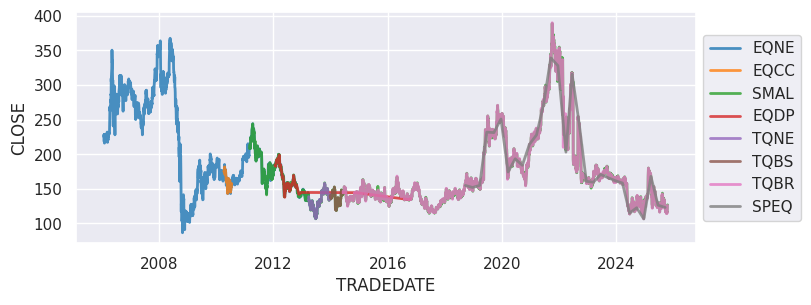

In [13]:
fig = plt.figure(figsize=(8, 3))
sns.lineplot(gazp_hist, x="TRADEDATE", y="CLOSE", hue="BOARDID", palette="tab10", linewidth=2, alpha=0.8)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

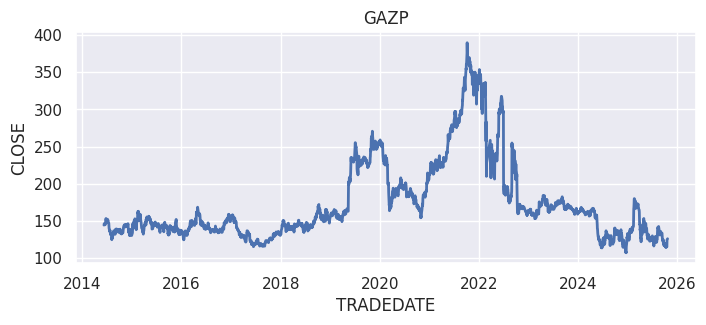

In [36]:
fig = plt.figure(figsize=(8,3))
gazp_tqbr = gazp_hist[gazp_hist["BOARDID"] == "TQBR"]
sns.lineplot(gazp_tqbr, x="TRADEDATE", y="CLOSE", linewidth=2)
plt.title("GAZP")
plt.show()

In [37]:
async def get_dividends(session, security):
    url = f"https://iss.moex.com/iss/securities/{security}/dividends.json"
    iss = aiomoex.ISSClient(session, url)
    data = await iss.get()
    return data
async def fast_query(func, *args, **kwargs):
    async with aiohttp.ClientSession() as session:
        ret = await func(session, *args, **kwargs)
    return ret

In [38]:
gazp_div_all = await fast_query(get_dividends, "GAZP")

In [39]:
gazp_div_all = pd.DataFrame(gazp_div_all["dividends"])

In [40]:
gazp_div_all.head()

,secid,isin,registryclosedate,value,currencyid
0,GAZP,RU0007661625,2014-07-17,7.20,RUB
1,GAZP,RU0007661625,2015-07-16,7.20,RUB
2,GAZP,RU0007661625,2016-07-20,7.89,RUB
3,GAZP,RU0007661625,2017-07-20,8.04,RUB
4,GAZP,RU0007661625,2018-07-19,8.04,RUB


In [41]:
def calculate_adjusted_close(prices_df, dividends_df):
    # Sort by date
    prices_df = prices_df.sort_values('TRADEDATE')
    dividends_df = dividends_df.sort_values('registryclosedate')
    
    # Create adjusted close starting from the most recent price
    adj_close = prices_df['CLOSE'].copy()
    
    # Work backwards through dividends to adjust historical prices
    for _, div in dividends_df.iterrows():
        ex_date = div['registryclosedate']  # Use appropriate date field
        dividend_amount = div['value']
        
        # Adjust all prices before ex-dividend date
        mask = prices_df['TRADEDATE'] < ex_date
        adj_close.loc[mask] = adj_close[mask] * (adj_close[mask] / (adj_close[mask] + dividend_amount))
    
    return adj_close


In [42]:
gazp_tqbr = gazp_hist[gazp_hist["BOARDID"] == "TQBR"].copy()
gazp_tqbr.loc[:, "CLOSE_ADJ"] = calculate_adjusted_close(gazp_tqbr, gazp_div_all)

In [43]:
gazp_tqbr["CLOSE"].isna().sum()

np.int64(18)

In [44]:
calculate_adjusted_close(gazp_tqbr, gazp_div_all).isna().sum()

np.int64(18)

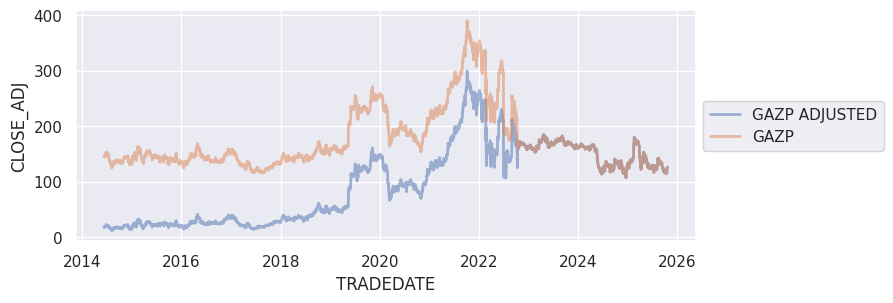

In [45]:
fig = plt.figure(figsize=(8,3))
sns.lineplot(gazp_tqbr, x="TRADEDATE", y="CLOSE_ADJ", linewidth=2, label="GAZP ADJUSTED", alpha=0.5)
sns.lineplot(gazp_tqbr, x="TRADEDATE", y="CLOSE", linewidth=2, label="GAZP", alpha=0.5)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
gazp_tqbr = gazp_tqbr.sort_values(by="TRADEDATE")
gazp_tqbr.loc[:, "LOG_RET"] = np.diff(np.log(gazp_tqbr["CLOSE_ADJ"]), prepend=np.log(gazp_tqbr["CLOSE_ADJ"].iloc[0]))

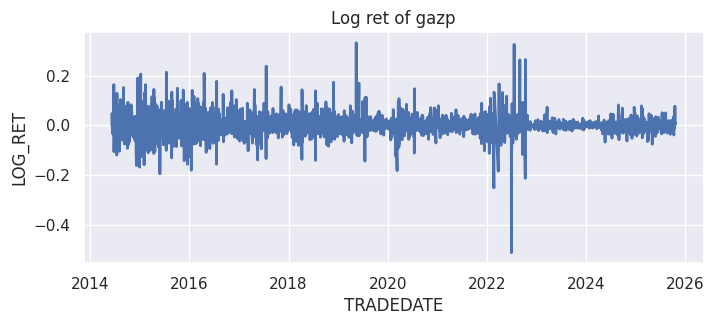

In [47]:
fig = plt.figure(figsize=(8,3))
sns.lineplot(gazp_tqbr, x="TRADEDATE", y="LOG_RET", linewidth=2)
plt.title("Log ret of gazp")
plt.show()

# Получение опорного значения для подсчета излишков

You should use Russian government bonds (OFZs) as the risk-free reference asset. While US government bonds were once used, geopolitical developments since early 2022 have made them an unsuitable benchmark for Russian investors due to asset blocks. 

**Why Russian government bonds?**

 - Government backing: As an obligation of the Russian government, they carry minimal credit risk within the domestic market.
 - Replacement of traditional methods: The shift from using Western assets for valuation and risk-free rates necessitates a local benchmark.
 - Market precedent: Academic studies on the Russian stock market have already used government bond rates, such as the one-month government bond rate, to calculate excess returns. 

**Important considerations**

 - Market and currency risk: While OFZs are a suitable risk-free proxy for ruble-denominated investments, they do not eliminate currency risk for non-ruble assets.
 - Financial statistics: If you use a Russian risk-free rate, you should also source your risk premiums and other financial data from Russian markets, as US financial statistics are no longer relevant.
 - Specific bond: For monthly excess return calculations, a one-month government bond rate is often used. For longer-term analysis, a longer-term OFZ could be more appropriate. 

In [48]:
display(boards.head())
bs = boards[boards["engine_id"] == stocks["id"]]
bsb = bs[bs["market_id"] == bonds["id"]]
print(len(bsb))
display(bsb)

,id,board_group_id,engine_id,market_id,boardid,board_title,is_traded,has_candles,is_primary
0,177,57,1,1,TQIF,Т+: Паи - безадрес.,1,1,1
1,178,57,1,1,TQTF,Т+: ETF - безадрес.,1,1,1
2,129,57,1,1,TQBR,Т+: Акции и ДР - безадрес.,1,1,1
3,130,57,1,1,TQBS,Т+: А2-Акции и паи - безадрес.,0,1,1
4,131,57,1,1,TQNL,Т+: Б-Акции и паи - безадрес.,0,1,1


36


,id,board_group_id,engine_id,market_id,boardid,board_title,is_traded,has_candles,is_primary
35,135,58,1,2,TQOB,Т+: Гособлигации - безадрес.,1,1,1
36,136,58,1,2,TQOS,Т+: А2-Облигации - безадрес.,0,1,1
37,137,58,1,2,TQNO,Т+: Б-Облигации - безадрес.,0,1,1
38,138,58,1,2,TQOV,Т+: В-Облигации - безадрес.,0,1,1
39,139,58,1,2,TQNB,Т+: Облигации внесписочные - безадрес.,0,1,1
40,140,58,1,2,TQUS,Т+: Облигации внеспис. в ин.валюте - безадрес.,0,1,1
41,349,58,1,2,TQCB,Т+: Облигации - безадрес.,1,1,1
42,361,58,1,2,TQRD,Т+: Облигации Д - безадрес.,1,1,1
43,377,58,1,2,TQIR,Т+ Облигации ПИР - безадрес.,0,1,1
44,226,193,1,2,TQOD,Т+: Облигации (USD) - безадрес.,1,1,0


In [49]:
gov_seqs = await fast_query(aiomoex.get_board_securities, board="TQOB", market="bonds", columns=None)
print(len(gov_seqs))
gov_seqs = pd.DataFrame(gov_seqs)
pd.set_option('display.max_columns', None)
display(gov_seqs.head())
print(gov_seqs.columns)

cols = ["SECID", "SHORTNAME", "BOARDNAME", "COUPONPERIOD", "SECNAME", "OFFERDATE", "SETTLEDATE"]
gov_seqs = gov_seqs[cols]
display(gov_seqs.head())

57


,SECID,BOARDID,SHORTNAME,PREVWAPRICE,YIELDATPREVWAPRICE,COUPONVALUE,NEXTCOUPON,ACCRUEDINT,PREVPRICE,LOTSIZE,FACEVALUE,BOARDNAME,STATUS,MATDATE,DECIMALS,COUPONPERIOD,ISSUESIZE,PREVLEGALCLOSEPRICE,PREVDATE,SECNAME,REMARKS,MARKETCODE,INSTRID,SECTORID,MINSTEP,FACEUNIT,BUYBACKPRICE,BUYBACKDATE,ISIN,LATNAME,REGNUMBER,CURRENCYID,ISSUESIZEPLACED,LISTLEVEL,SECTYPE,COUPONPERCENT,OFFERDATE,SETTLEDATE,LOTVALUE,FACEVALUEONSETTLEDATE,CALLOPTIONDATE,PUTOPTIONDATE,DATEYIELDFROMISSUER
0,SU26207RMFS9,TQOB,ОФЗ 26207,93.072,14.70,40.64,2026-02-04,17.19,93.061,1,1000.0,Т+: Гособлигации - безадрес.,A,2027-02-03,4,182,370299980,93.150,2025-10-20,ОФЗ-ПД 26207 03/02/27,None,FNDT,GOFZ,None,0.001,SUR,None,0000-00-00,RU000A0JS3W6,OFZ-PD 26207,26207RMFS,SUR,370299980.0,1,3,8.15,None,2025-10-22,1000.0,1000.0,None,None,None
1,SU26212RMFS9,TQOB,ОФЗ 26212,86.383,14.85,35.15,2026-01-21,17.58,86.370,1,1000.0,Т+: Гособлигации - безадрес.,A,2028-01-19,4,182,356981514,86.608,2025-10-20,ОФЗ-ПД 26212 19/01/28,None,FNDT,GOFZ,None,0.001,SUR,None,0000-00-00,RU000A0JTK38,OFZ-PD 26212,26212RMFS,SUR,348053926.0,1,3,7.05,None,2025-10-22,1000.0,1000.0,None,None,None
2,SU26218RMFS6,TQOB,ОФЗ 26218,77.286,14.83,42.38,2026-03-25,6.52,77.119,1,1000.0,Т+: Гособлигации - безадрес.,A,2031-09-17,4,182,347608211,77.200,2025-10-20,ОФЗ-ПД 26218 17/09/31,None,FNDT,GOFZ,None,0.001,SUR,None,0000-00-00,RU000A0JVW48,OFZ-PD 26218,26218RMFS,SUR,347608211.0,1,3,8.50,None,2025-10-22,1000.0,1000.0,None,None,None
3,SU26219RMFS4,TQOB,ОФЗ 26219,95.185,14.02,38.64,2026-03-18,7.43,95.183,1,1000.0,Т+: Гособлигации - безадрес.,A,2026-09-16,4,182,362076549,95.214,2025-10-20,ОФЗ-ПД 26219 16/09/26,None,FNDT,GOFZ,None,0.001,SUR,None,0000-00-00,RU000A0JWM07,OFZ-PD 26219,26219RMFS,SUR,362076549.0,1,3,7.75,None,2025-10-22,1000.0,1000.0,None,None,None
4,SU26221RMFS0,TQOB,ОФЗ 26221,70.235,14.86,38.39,2026-04-01,4.43,70.157,1,1000.0,Т+: Гособлигации - безадрес.,A,2033-03-23,4,182,396268629,70.206,2025-10-20,ОФЗ-ПД 26221 23/03/33,None,FNDT,GOFZ,None,0.001,SUR,None,0000-00-00,RU000A0JXFM1,OFZ-PD 26221,26221RMFS,SUR,396268622.0,1,3,7.70,None,2025-10-22,1000.0,1000.0,None,None,None


Index(['SECID', 'BOARDID', 'SHORTNAME', 'PREVWAPRICE', 'YIELDATPREVWAPRICE',
       'COUPONVALUE', 'NEXTCOUPON', 'ACCRUEDINT', 'PREVPRICE', 'LOTSIZE',
       'FACEVALUE', 'BOARDNAME', 'STATUS', 'MATDATE', 'DECIMALS',
       'COUPONPERIOD', 'ISSUESIZE', 'PREVLEGALCLOSEPRICE', 'PREVDATE',
       'SECNAME', 'REMARKS', 'MARKETCODE', 'INSTRID', 'SECTORID', 'MINSTEP',
       'FACEUNIT', 'BUYBACKPRICE', 'BUYBACKDATE', 'ISIN', 'LATNAME',
       'REGNUMBER', 'CURRENCYID', 'ISSUESIZEPLACED', 'LISTLEVEL', 'SECTYPE',
       'COUPONPERCENT', 'OFFERDATE', 'SETTLEDATE', 'LOTVALUE',
       'FACEVALUEONSETTLEDATE', 'CALLOPTIONDATE', 'PUTOPTIONDATE',
       'DATEYIELDFROMISSUER'],
      dtype='object')


,SECID,SHORTNAME,BOARDNAME,COUPONPERIOD,SECNAME,OFFERDATE,SETTLEDATE
0,SU26207RMFS9,ОФЗ 26207,Т+: Гособлигации - безадрес.,182,ОФЗ-ПД 26207 03/02/27,None,2025-10-22
1,SU26212RMFS9,ОФЗ 26212,Т+: Гособлигации - безадрес.,182,ОФЗ-ПД 26212 19/01/28,None,2025-10-22
2,SU26218RMFS6,ОФЗ 26218,Т+: Гособлигации - безадрес.,182,ОФЗ-ПД 26218 17/09/31,None,2025-10-22
3,SU26219RMFS4,ОФЗ 26219,Т+: Гособлигации - безадрес.,182,ОФЗ-ПД 26219 16/09/26,None,2025-10-22
4,SU26221RMFS0,ОФЗ 26221,Т+: Гособлигации - безадрес.,182,ОФЗ-ПД 26221 23/03/33,None,2025-10-22


In [50]:
gov_seqs["COUPONPERIOD"].unique()

array([182, 189,  91, 364])

In [51]:
rand_obl_hist = await fast_query(aiomoex.get_board_history, security="SU26207RMFS9", board="TQOB", market="bonds")

In [52]:
obl_hist = pd.DataFrame(rand_obl_hist)
display(obl_hist.head())

,BOARDID,TRADEDATE,CLOSE,VOLUME,VALUE
0,TQOB,2013-03-25,108.0,20,21600.0
1,TQOB,2013-03-26,NaN,0,0.0
2,TQOB,2013-03-27,NaN,0,0.0
3,TQOB,2013-03-28,NaN,0,0.0
4,TQOB,2013-03-29,NaN,0,0.0


In [53]:
print(len(obl_hist["TRADEDATE"].unique()))
print(len(obl_hist))

3177
3177


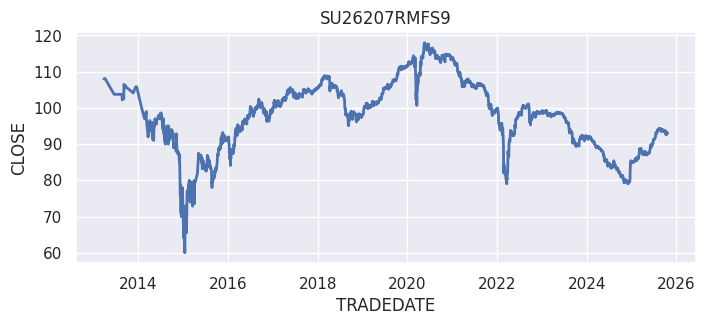

In [54]:
fig = plt.figure(figsize=(8,3))
obl_price = obl_hist.copy()
obl_price["TRADEDATE"] = pd.to_datetime(obl_price["TRADEDATE"])
sns.lineplot(obl_price, x="TRADEDATE", y="CLOSE", linewidth=2)
plt.title("SU26207RMFS9")
plt.show()

In [55]:
async def get_coupons(session, security):
    url = f"https://iss.moex.com/iss/statistics/engines/stock/markets/bonds/bondization/{security}.json"
    iss = aiomoex.ISSClient(session, url)
    data = []

    start = 0
    while True:
        page = await iss.get(start)
        # print(page.keys())
        # print(page["amortizations"])
        # print(page["amortizations.cursor"])
            
        data.extend(page["coupons"])

        cursor = page["coupons.cursor"][0]
        parsed = (cursor["INDEX"] + 1) * cursor["PAGESIZE"]
        if parsed >= cursor["TOTAL"]:
            break
        start = parsed

    data = pd.DataFrame(data)
    data["coupondate"] = pd.to_datetime(data["coupondate"])
    return data


In [56]:
coupons = await fast_query(get_coupons, security="SU26207RMFS9")
print(len(coupons))
display(coupons.head())

30


,isin,name,issuevalue,coupondate,recorddate,startdate,initialfacevalue,facevalue,faceunit,value,valueprc,value_rub,secid,primary_boardid
0,RU000A0JS3W6,ОФЗ-ПД 26207 03/02/27,370299980000,2012-08-22,2012-08-21,2012-02-22,1000,1000,RUB,40.64,8.15,40.64,SU26207RMFS9,TQOB
1,RU000A0JS3W6,ОФЗ-ПД 26207 03/02/27,370299980000,2013-02-20,2013-02-19,2012-08-22,1000,1000,RUB,40.64,8.15,40.64,SU26207RMFS9,TQOB
2,RU000A0JS3W6,ОФЗ-ПД 26207 03/02/27,370299980000,2013-08-21,2013-08-20,2013-02-20,1000,1000,RUB,40.64,8.15,40.64,SU26207RMFS9,TQOB
3,RU000A0JS3W6,ОФЗ-ПД 26207 03/02/27,370299980000,2014-02-19,2014-02-18,2013-08-21,1000,1000,RUB,40.64,8.15,40.64,SU26207RMFS9,TQOB
4,RU000A0JS3W6,ОФЗ-ПД 26207 03/02/27,370299980000,2014-08-20,2014-08-19,2014-02-19,1000,1000,RUB,40.64,8.15,40.64,SU26207RMFS9,TQOB


30


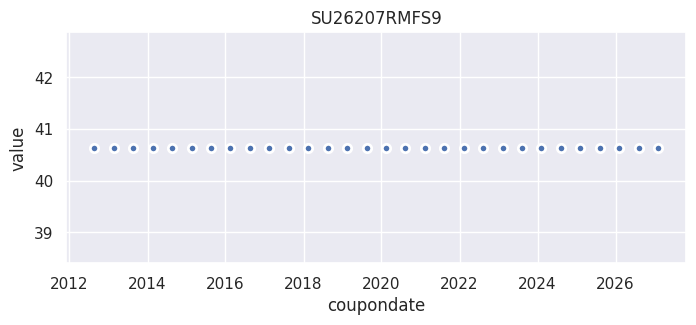

In [57]:
fig = plt.figure(figsize=(8,3))
print(len(coupons["coupondate"].unique()))
sns.scatterplot(coupons, x="coupondate", y="value", linewidth=2)
plt.title("SU26207RMFS9")
plt.show()